<a href="https://colab.research.google.com/github/PRsant90/Challenge_datos_2/blob/main/Challenge_Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
datos_clientes = pd.read_json('/content/drive/MyDrive/challenge 2/TelecomX_Data.json')
datos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [4]:
customer_df = pd.json_normalize(datos_clientes['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

In [5]:
phone_df = pd.json_normalize(datos_clientes['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

In [6]:
internet_df = pd.json_normalize(datos_clientes['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

In [7]:
account_simple_df = pd.json_normalize(
    datos_clientes['account'].apply(lambda x: {k: v for k, v in x.items() if k != 'Charges'})
)
account_simple_df.columns = [f'account_{col}' for col in account_simple_df.columns]


In [8]:
charges_df = pd.json_normalize(datos_clientes['account'].apply(lambda x: x['Charges']))
charges_df.columns = [f'account_Charges_{col}' for col in charges_df.columns]

In [9]:
df_final = pd.concat([datos_clientes[['customerID','Churn']],
                      customer_df,
                      phone_df,
                      internet_df,
                      account_simple_df,
                      charges_df], axis=1)

In [10]:
print(df_final.head())
print(df_final.columns)

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

In [11]:
df_final.head(100)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0151-ONTOV,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Mailed check,70.90,70.9
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
97,0156-FVPTA,Yes,Male,0,Yes,No,22,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.20,1152.7
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85


In [12]:
df_final.info

<bound method DataFrame.info of       customerID Churn customer_gender  customer_SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Ye

In [13]:
df_final.shape

(7267, 21)

In [14]:
df_final.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [15]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [16]:
for col in df_final.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_final[col].unique()[:5]}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']
Churn: ['No' 'Yes' '']
customer_gender: ['Female' 'Male']
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: ['Yes' 'No']
account_PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account_Charges_Total: ['593.3' '542.4' '280.85' '1237.85' '267.4']


In [17]:
df_final['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


El 26 % se fue, hay que averiguar porque

In [18]:
df_final.isnull().sum().sort_values(ascending=False)

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [19]:
df_final.duplicated().sum()

np.int64(0)

In [20]:
print(df_final[['account_Charges_Monthly', 'account_Charges_Total']].head())

   account_Charges_Monthly account_Charges_Total
0                     65.6                 593.3
1                     59.9                 542.4
2                     73.9                280.85
3                     98.0               1237.85
4                     83.9                 267.4


In [21]:
for col in df_final.select_dtypes(include='object'):
    df_final[col] = df_final[col].str.strip().str.lower()

In [22]:
for col in df_final.select_dtypes(include='object'):
    print(f'{col}: {df_final[col].unique()}')

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes' '']
customer_gender: ['female' 'male']
customer_Partner: ['yes' 'no']
customer_Dependents: ['yes' 'no']
phone_PhoneService: ['yes' 'no']
phone_MultipleLines: ['no' 'yes' 'no phone service']
internet_InternetService: ['dsl' 'fiber optic' 'no']
internet_OnlineSecurity: ['no' 'yes' 'no internet service']
internet_OnlineBackup: ['yes' 'no' 'no internet service']
internet_DeviceProtection: ['no' 'yes' 'no internet service']
internet_TechSupport: ['yes' 'no' 'no internet service']
internet_StreamingTV: ['yes' 'no' 'no internet service']
internet_StreamingMovies: ['no' 'yes' 'no internet service']
account_Contract: ['one year' 'month-to-month' 'two year']
account_PaperlessBilling: ['yes' 'no']
account_PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
account_Charges_Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

In [23]:
cols_internet = [col for col in df_final.columns if 'internet_' in col and col != 'internet_InternetService']

for col in cols_internet:
    df_final[col] = df_final[col].replace('no internet service', 'no')

In [24]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [25]:
df_final['account_Charges_Monthly'] = pd.to_numeric(df_final['account_Charges_Monthly'], errors='coerce')
df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')
df_final['customer_SeniorCitizen'] = df_final['customer_SeniorCitizen'].astype(int)
df_final['customer_tenure'] = df_final['customer_tenure'].astype(int)


In [26]:
df_final.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [27]:
binarias = []
for col in df_final.columns:
    valores = df_final[col].dropna().unique()
    if set(valores).issubset({'yes', 'no'}):
        binarias.append(col)

df_final[binarias] = df_final[binarias].replace({'yes': 1, 'no': 0})
df_final[binarias] = df_final[binarias].astype(int)

/tmp/ipython-input-3778097003.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[binarias] = df_final[binarias].replace({'yes': 1, 'no': 0})


In [28]:
print(df_final.head())
print(df_final.dtypes)


   customerID Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0  0002-orfbo    no          female                       0                 1   
1  0003-mknfe    no            male                       0                 0   
2  0004-tlhlj   yes            male                       0                 0   
3  0011-igkff   yes            male                       1                 1   
4  0013-exchz   yes          female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService  ...  internet_OnlineBackup  \
0                  no                      dsl  ...     

In [29]:
df_final = df_final.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evasión',
    'customer_gender': 'sexo',
    'customer_SeniorCitizen': 'adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'antiguedad_meses',
    'phone_PhoneService': 'servicio_telefono',
    'phone_MultipleLines': 'lineas_multiples',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_online',
    'internet_DeviceProtection': 'proteccion_dispositivos',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'usa_streaming_tv',
    'internet_StreamingMovies': 'usa_streaming_pelis',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_online',
    'account_PaymentMethod': 'metodo_pago',
    'account_Charges_Monthly': 'cargos_mensuales',
    'account_Charges_Total': 'cargos_totales'
})


In [30]:
df_final['sexo'] = df_final['sexo'].map({'male': 1, 'female': 0})


In [31]:
df_final.isnull().sum()

,0
id_cliente,0
evasión,0
sexo,0
adulto_mayor,0
tiene_pareja,0
tiene_dependientes,0
antiguedad_meses,0
servicio_telefono,0
lineas_multiples,0
tipo_internet,0


In [32]:
df_final = df_final.rename(columns={'sexo_male': 'sexo'})

In [33]:
df_final['cargos_totales'] = pd.to_numeric(df_final['cargos_totales'], errors='coerce')
df_final = df_final.dropna(subset=['cargos_totales'])

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7256 non-null   object 
 1   evasión                  7256 non-null   object 
 2   sexo                     7256 non-null   int64  
 3   adulto_mayor             7256 non-null   int64  
 4   tiene_pareja             7256 non-null   int64  
 5   tiene_dependientes       7256 non-null   int64  
 6   antiguedad_meses         7256 non-null   int64  
 7   servicio_telefono        7256 non-null   int64  
 8   lineas_multiples         7256 non-null   object 
 9   tipo_internet            7256 non-null   object 
 10  seguridad_en_linea       7256 non-null   int64  
 11  respaldo_online          7256 non-null   int64  
 12  proteccion_dispositivos  7256 non-null   int64  
 13  soporte_tecnico          7256 non-null   int64  
 14  usa_streaming_tv         7256

In [35]:
df_final['cuentas_diarias'] = df_final['cargos_mensuales']/30
print(df_final[['cargos_mensuales','cuentas_diarias']].head())

   cargos_mensuales  cuentas_diarias
0              65.6         2.186667
1              59.9         1.996667
2              73.9         2.463333
3              98.0         3.266667
4              83.9         2.796667


In [36]:
print(df_final['evasión'].unique())

['no' 'yes' '']


In [37]:
df_final[df_final['evasión'] =='']

,id_cliente,evasión,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,tipo_contrato,factura_online,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
30,0047-zhdtw,,0,0,0,0,11,1,yes,fiber optic,...,0,0,0,0,month-to-month,1,bank transfer (automatic),79.00,929.30,2.633333
75,0120-yzlqa,,1,0,0,0,71,1,no,no,...,0,0,0,0,two year,1,credit card (automatic),19.90,1355.10,0.663333
96,0154-qyhju,,1,0,0,0,29,1,no,dsl,...,0,1,0,0,one year,1,electronic check,58.75,1696.20,1.958333
98,0162-rzgmz,,0,1,0,0,5,1,no,dsl,...,0,1,0,0,month-to-month,0,credit card (automatic),59.90,287.85,1.996667
175,0274-vvqoq,,1,1,1,0,65,1,yes,fiber optic,...,1,0,1,1,one year,1,bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-gsrfx,,0,0,0,0,14,1,yes,dsl,...,0,0,0,0,one year,1,mailed check,54.25,773.20,1.808333
7180,9872-rzqqb,,0,0,1,0,49,0,no phone service,dsl,...,0,0,1,0,month-to-month,0,bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-gndmb,,1,0,0,0,9,1,yes,fiber optic,...,0,0,0,0,month-to-month,1,electronic check,76.25,684.85,2.541667
7239,9955-rvwsc,,0,0,1,1,67,1,no,no,...,0,0,0,0,two year,1,bank transfer (automatic),19.25,1372.90,0.641667


In [38]:
df_final = df_final[df_final['evasión'] !='']

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7032 non-null   object 
 1   evasión                  7032 non-null   object 
 2   sexo                     7032 non-null   int64  
 3   adulto_mayor             7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependientes       7032 non-null   int64  
 6   antiguedad_meses         7032 non-null   int64  
 7   servicio_telefono        7032 non-null   int64  
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  respaldo_online          7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tecnico          7032 non-null   int64  
 14  usa_streaming_tv         7032

#📊 Carga y análisis



In [40]:
df_final.describe()

,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,seguridad_en_linea,respaldo_online,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,factura_online,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [41]:
df_final['evasión'] = df_final['evasión'].replace({'yes': 1, 'no': 0})  # ← Esto no cambia dtype automáticamente


/tmp/ipython-input-2000717567.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['evasión'] = df_final['evasión'].replace({'yes': 1, 'no': 0})  # ← Esto no cambia dtype automáticamente


In [42]:
df_final['evasión'] = pd.to_numeric(df_final['evasión'], errors='coerce').astype(int)


In [43]:
print(df_final['evasión'].dtype)

int64


In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7032 non-null   object 
 1   evasión                  7032 non-null   int64  
 2   sexo                     7032 non-null   int64  
 3   adulto_mayor             7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependientes       7032 non-null   int64  
 6   antiguedad_meses         7032 non-null   int64  
 7   servicio_telefono        7032 non-null   int64  
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   int64  
 11  respaldo_online          7032 non-null   int64  
 12  proteccion_dispositivos  7032 non-null   int64  
 13  soporte_tecnico          7032 non-null   int64  
 14  usa_streaming_tv         7032

In [45]:
df_final.head()

,id_cliente,evasión,sexo,adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,servicio_telefono,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,usa_streaming_tv,usa_streaming_pelis,tipo_contrato,factura_online,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-orfbo,0,0,0,1,1,9,1,no,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,1,0,0,0,9,1,yes,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,1,0,0,0,4,1,no,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,1,1,1,0,13,1,no,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,0,1,1,0,3,1,no,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [46]:
columnas_interes = ['antiguedad_meses', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']

for col in columnas_interes:
    print(f'\n📊 {col.upper()}')
    print(f"Media: {df_final[col].mean():.2f}")
    print(f"Mediana: {df_final[col].median():.2f}")
    print(f"Desviación estándar: {df_final[col].std():.2f}")
    print(f"Mínimo: {df_final[col].min():.2f}")
    print(f"Máximo: {df_final[col].max():.2f}")



📊 ANTIGUEDAD_MESES
Media: 32.42
Mediana: 29.00
Desviación estándar: 24.55
Mínimo: 1.00
Máximo: 72.00

📊 CARGOS_MENSUALES
Media: 64.80
Mediana: 70.35
Desviación estándar: 30.09
Mínimo: 18.25
Máximo: 118.75

📊 CARGOS_TOTALES
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77
Mínimo: 18.80
Máximo: 8684.80

📊 CUENTAS_DIARIAS
Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96


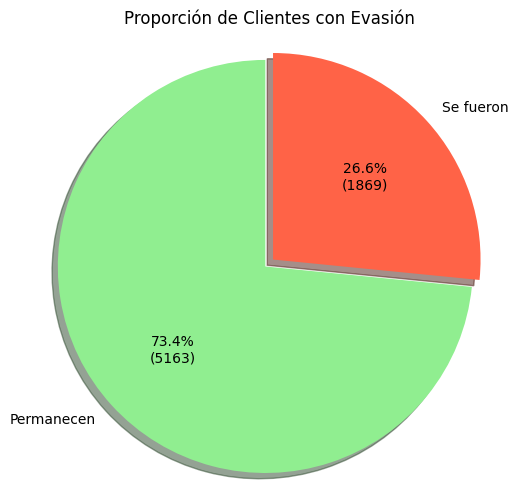

In [47]:
import matplotlib.pyplot as plt

# Conteo de clientes por evasión
conteo = df_final['evasión'].value_counts().sort_index()
labels = ['Permanecen', 'Se fueron']
colors = ['lightgreen', 'tomato']

# Función para mostrar % y cantidad
def autopct_func(pct):
    total = conteo.sum()
    valor = int(round(pct/100. * total))
    return f'{pct:.1f}%\n({valor})'

# Gráfico
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=labels, autopct=autopct_func, colors=colors,
        explode=(0, 0.05), shadow=True, startangle=90)
plt.savefig('clientes_evasion.png', dpi=300, bbox_inches='tight')
plt.title('Proporción de Clientes con Evasión')
plt.axis('equal')  # Para que sea circular
plt.show()



/tmp/ipython-input-2665840847.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['female', 'male'])
/tmp/ipython-input-2665840847.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['no', 'sí'])


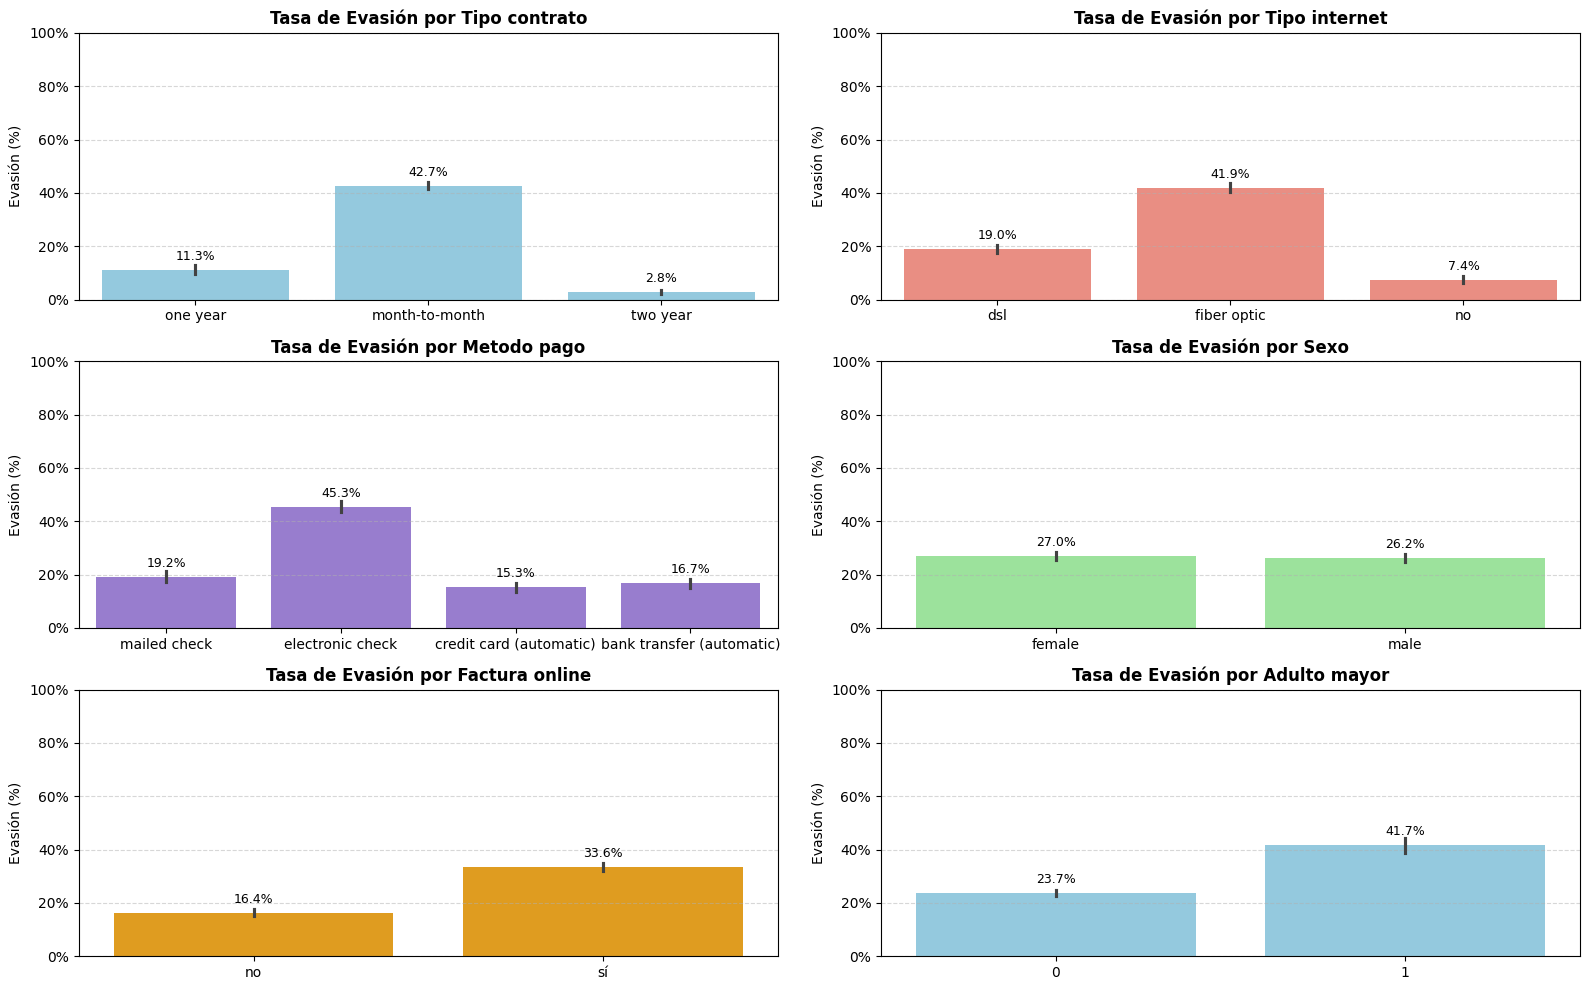

In [48]:
import seaborn as sns
from matplotlib.ticker import PercentFormatter

categorias = ['tipo_contrato', 'tipo_internet', 'metodo_pago', 'sexo', 'factura_online','adulto_mayor']
n = len(categorias)
colores = ['skyblue', 'salmon', 'mediumpurple', 'lightgreen', 'orange']

fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorias):
    ax = axes[i]
    sns.barplot(data=df_final, x=col, y='evasión', estimator='mean',
                ax=ax, color=colores[i % len(colores)])

    ax.set_title(f'Tasa de Evasión por {col.replace("_", " ").capitalize()}', fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Evasión (%)')
    ax.set_ylim(0, 1)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax.grid(axis='y', linestyle='--', alpha=0.5)


    if col == 'sexo':
        ax.set_xticklabels(['female', 'male'])
    elif col == 'factura_online':
        ax.set_xticklabels(['no', 'sí'])

    # Etiquetas arriba de las barras
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height*100:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.savefig('clientes_evasion_tipos.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()




In [49]:
df_final['antigüedad_grupo'] = pd.cut(df_final['antiguedad_meses'],
                                      bins=[0, 6, 12, 24, 36, 48, 60, 72],
                                      labels=['0–6', '7–12', '13–24', '25–36', '37–48', '49–60', '61–72'])


/tmp/ipython-input-2585644584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_evasion_antiguedad = df_final.groupby('antigüedad_grupo')['evasión'].mean()


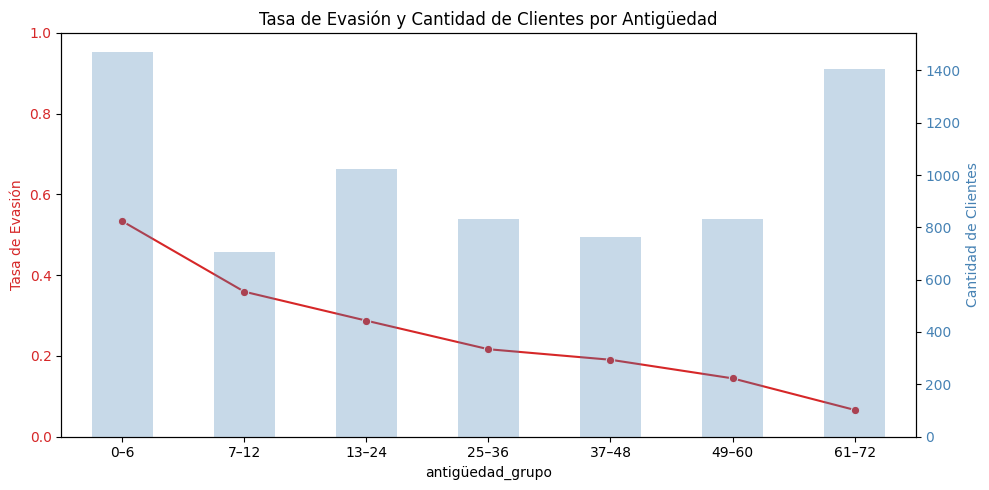

In [50]:
cuenta_clientes = df_final['antigüedad_grupo'].value_counts().sort_index()
tasa_evasion_antiguedad = df_final.groupby('antigüedad_grupo')['evasión'].mean()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_ylabel('Tasa de Evasión', color=color)
sns.lineplot(data=tasa_evasion_antiguedad, marker='o', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,1)

ax2 = ax1.twinx()
color = 'steelblue'
ax2.set_ylabel('Cantidad de Clientes', color=color)
cuenta_clientes.plot(kind='bar', alpha=0.3, color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tasa de Evasión y Cantidad de Clientes por Antigüedad')
plt.xlabel('Meses de Antigüedad (rangos)')
plt.savefig('clientes_evasion_ant_cantclientes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

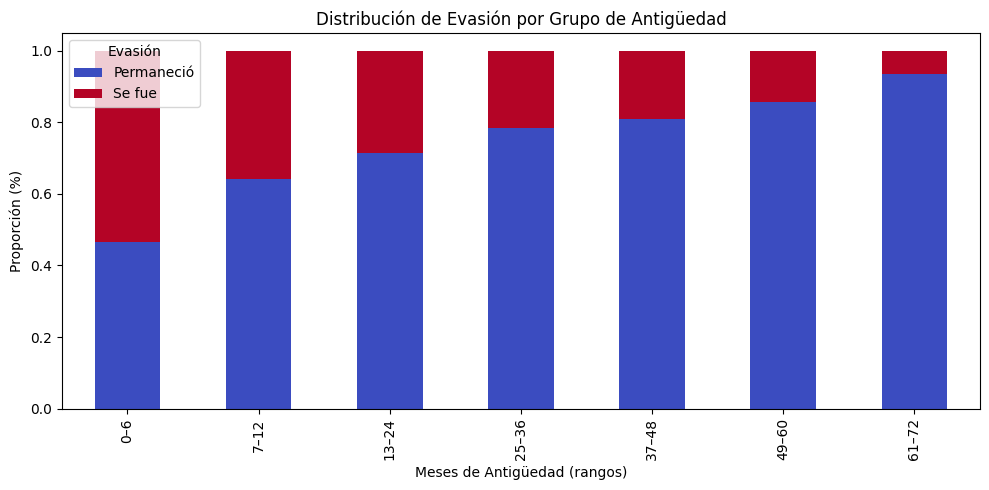

In [51]:
# Crear tabla de frecuencia
tabla = pd.crosstab(df_final['antigüedad_grupo'], df_final['evasión'], normalize='index')

# Renombrar columnas si evasión es 0/1
tabla.columns = ['Permaneció', 'Se fue']

# Graficar
tabla.plot(kind='bar', stacked=True, figsize=(10,5), colormap='coolwarm')
plt.title('Distribución de Evasión por Grupo de Antigüedad')
plt.xlabel('Meses de Antigüedad (rangos)')
plt.ylabel('Proporción (%)')
plt.legend(title='Evasión')
plt.savefig('clientes_evasion_ant_grupo.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


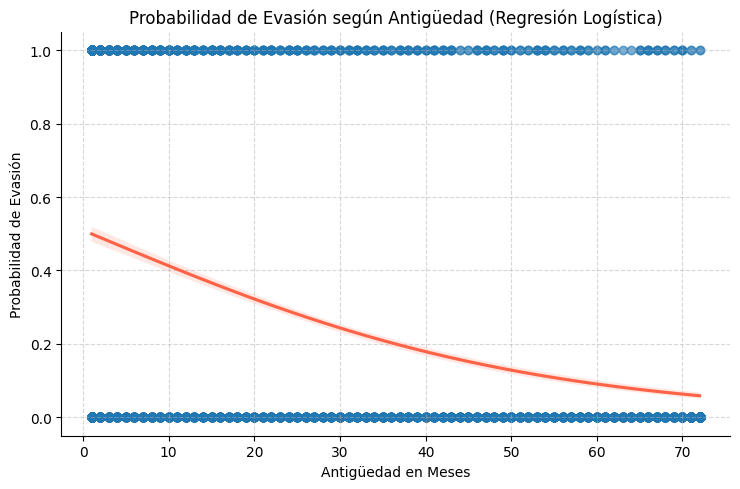

In [52]:
sns.lmplot(data=df_final, x='antiguedad_meses', y='evasión',
           logistic=True, height=5, aspect=1.5,
           scatter_kws={'alpha':0.2}, line_kws={"color":"tomato"})
plt.title('Probabilidad de Evasión según Antigüedad (Regresión Logística)')
plt.xlabel('Antigüedad en Meses')
plt.ylabel('Probabilidad de Evasión')
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('clientes_evasion_ant_regresion.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

/tmp/ipython-input-815102006.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_heat = pd.pivot_table(df_final, values='evasión',


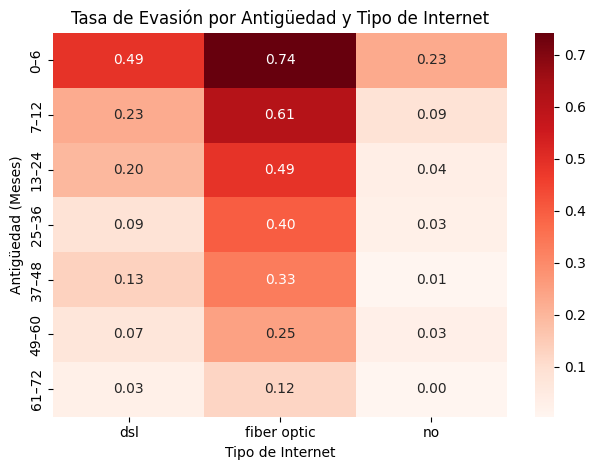

In [53]:
tabla_heat = pd.pivot_table(df_final, values='evasión',
                             index='antigüedad_grupo',
                             columns='tipo_internet',
                             aggfunc='mean')

sns.heatmap(tabla_heat, annot=True, fmt=".2f", cmap='Reds')
plt.title('Tasa de Evasión por Antigüedad y Tipo de Internet')
plt.ylabel('Antigüedad (Meses)')
plt.xlabel('Tipo de Internet')
plt.savefig('clientes_evasion_ant_calor.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

/tmp/ipython-input-924548293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='evasión', y='cargos_totales', palette='Set2')


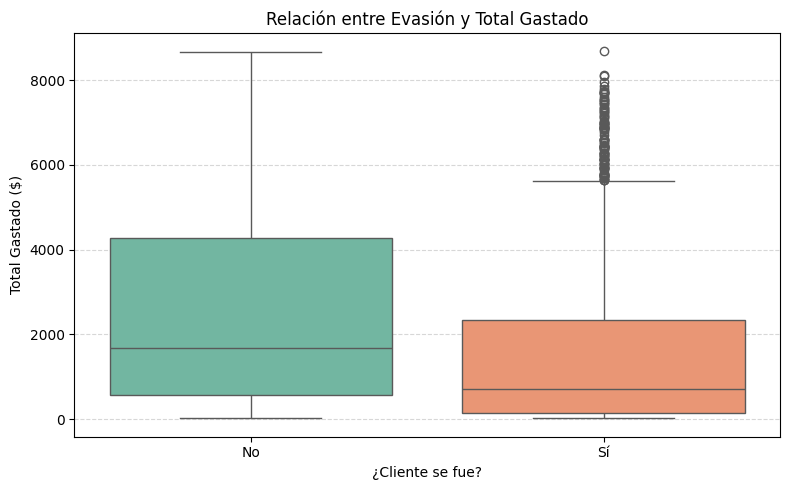

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_final, x='evasión', y='cargos_totales', palette='Set2')
plt.title('Relación entre Evasión y Total Gastado')
plt.xlabel('¿Cliente se fue?')
plt.ylabel('Total Gastado ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.savefig('clientes_evasion_gasto.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

/tmp/ipython-input-641615551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final, x='evasión', y='cargos_totales', palette='Set2', inner='quartile')


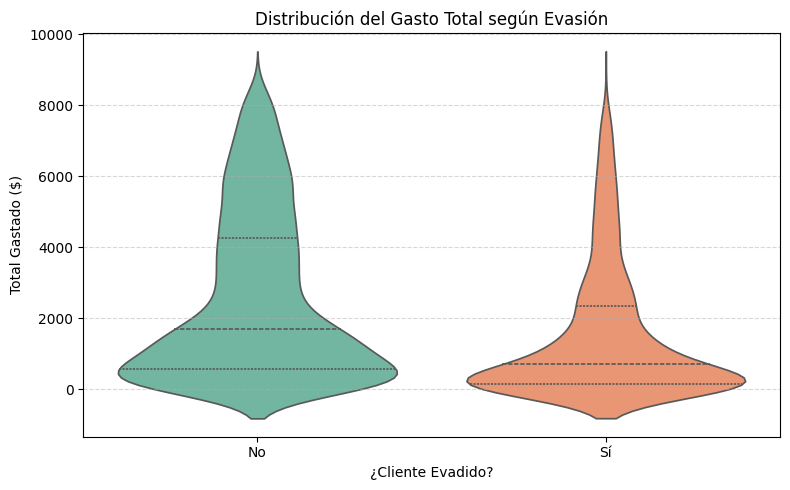

In [55]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_final, x='evasión', y='cargos_totales', palette='Set2', inner='quartile')
plt.title('Distribución del Gasto Total según Evasión')
plt.xlabel('¿Cliente Evadido?')
plt.ylabel('Total Gastado ($)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3965032973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x='evasión', y='cargos_totales', palette='Set2')


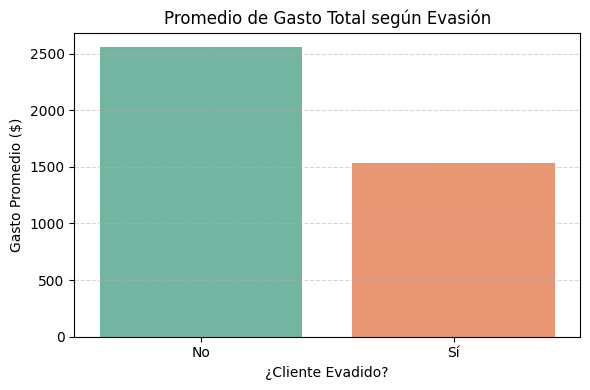

In [56]:
# Calcular promedio de gasto por grupo
promedios = df_final.groupby('evasión')['cargos_totales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=promedios, x='evasión', y='cargos_totales', palette='Set2')
plt.title('Promedio de Gasto Total según Evasión')
plt.xlabel('¿Cliente Evadido?')
plt.ylabel('Gasto Promedio ($)')
plt.xticks([0, 1], ['No', 'Sí'])  # Si tus valores son 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#📄Informe final

Este informe final fue llevado al README tambien con los graficos

# 📊 Challenge de Evasión de Clientes — TelecomX

Este Challenge se enfocó en realizar una extracción, limpieza y analisis de datos con python, ultizando pandas, matplotlib y seaborn, con el fin de entender por qué los clientes abandonan la empresa TelecomX, mediante un analisis exploratorio basado en un dataset estructurado con información sobre contratos, servicios y comportamiento de los usuarios,etc. A partir de este análisis, se proponen acciones que permitan mejorar la fidelización de clientes y que la empresa telecomX sea rentable en el tiempo.

---

## 🔍 Principales Hallazgos y Explicaciones

### 1. **Tasa de evasión: 26% de los clientes se van de la compañia de telecomunicaciones**

Esto significa que aproximadamente **1 de cada 4 clientes** deja el servicio propuesto por la empresa. Esta tasa es crítica, ya que representa una pérdida directa de ingresos , lo cual supera los margenes aceptables del rubro de telecomunicaciones. Este margen esta en el nivel superior segun punto de vista economico, ya que el rango maximo de evasión ronda para que sea rentable entre un 10 a 25% (Esta empresa tiene un 26%). Y puede estar relacionada con insatisfacción, falta de lealtad o debilidad en la propuesta de valor percibida.

Esto se ve de mejor manera si lo traemos a numeros tangibles en un ejemplo.

Si suponemos que tenemos 100 clientes que captas como muestra y se van 26. Y este costo de adquisición (CAC) es alto, y el valor de vida del cliente es bajo, es probable que no sea rentable y no se pueda recuperar la inversión inicial de adquisición.

Esto se explicara con mas detalle en el punto siguente con la tasa de retención(antiguedad)

![Tasa de evasión](graficos/clientes_evasion.png)
---

### 2. **Antigüedad: los clientes nuevos (0–12 meses) se evaden más**

Se agruparon los clientes por rangos de antigüedad (en meses). El análisis muestra que la **mayor tasa de evasión ocurre en los primeros 6 a 12 meses**. Esto indica que los clientes que recién ingresan:

- Aún no han construido una relación sólida con la empresa.
- Pueden experimentar dificultades en la implementación o servicios defectuosos iniciales.
- Tienen menor compromiso emocional o contractual.
  
![Tasa de evasión](graficos/clientes_evasion_ant_grupo.png)

🔎 **Interpretación**: Los primeros meses son críticos. Si no se establece confianza y valor desde el principio, el riesgo de abandono es mucho mayor.

Por lo que, retomando el punto anterior con este y dejando el siguente ejemplo podemos ver de mejor manera que esto puede ser peligroso y dejar a la empresa fuera del rubro por no ser rentable. Si nos suponemos como en el punto anterior el CAC es alto y el retorno mensual por cliente es bajo, tenemos :

Costo de Adquisición (CAC) = $150
Ingreso mensual por cliente = $20
Margen neto mensual = $10

Si el cliente con estos datos se va entre en el limite superior de 12 meses te deja una ganancia neta de $120 por lo que estas perdiendo $30 por cada cliente.

---

### 3. **Distribución: mayoría son clientes nuevos y los la mayor parte de los que se van**

La mayoría de los clientes actuales tienen menos de 12 meses de antigüedad y son los que mayormente se van por lo que hay problemas de fidelización del cliente. Esto puede ser a factores, como el valor percibido, o la poca o nula asistencia que puede recibir el cliente, ya sea tecnica o comercial los primeros meses. Ademas, de otros factores que podremos analizar en los puntos siguentes. Por lo tanto, la empresa debe concentrar esfuerzos de retención en este grupo, ya que cualquier mejora tendrá un impacto directo sobre el total de clientes.

![Tasa de evasión](graficos/clientes_evasion_ant_cantclientes.png)
---

### 4. **Contrato mensual = Mayor Tasa de Salida**

Al analizar el tipo de contrato (mensual, anual o bianual), se encontró que los clientes con **contratos mensuales presentan la mayor tasa de evasión**. En cambio, los contratos de mayor duración retienen más clientes, ya que al ser un pago unico y por lo general a la larga sale mas barato, por ende podria darse enfasis a este servicio o mejorar las ofertas o insentivos para poder hacer mas atractiva este tipo de contrato o el bi anual tambien.

📌 **Explicación**:
- Los contratos mensuales permiten salir fácilmente, lo que reduce el compromiso.
- En cambio, los contratos anuales o bianuales implican planificación y generalmente ofrecen mejores precios.


Por otro lado embargo, otros factores asociados con la tasa de salida son :

 #Tipo de internet#

- Existe una correlación en el mapa de calor entre el tipo de servicio de internet contratado y la mayor cantidad de personas que se van de telecomX (42 %)  esto puede ser debido a problemas especificos con el tipo internet contratado, o el sector en especifico. Ya que este suele ser el mas claro o el que tiene mayor calidad.
  
![Tasa de evasión](graficos/![Tasa de evasión](graficos/clientes_evasion_ant_calor.png)

#Edad#

-La tasa de adulto mayor que deja el servicio es de 42% tambien. Esto se correlaciona al abandono de planes a los pocos meses, ya que por lo general la gente adulta mayor no se maneja mucho con estos servicios y los medios de ayuda al cliente. Por lo que se da a entender que no existe un soporte adecuado, para los problemas recurrentes a los primeros meses de contratación


#Metodo de pago#

En los metodos de pago, el que destaca por una alta salida de clientes es el metodo de electronic check (pago electronico) que no es automatico. Da a entender que el servicio no es muy valorado por los clientes, ya que la no existir un valor percibido o una fidelización fuerte del producto. No dan ganas de hacer el pago manual mediante plataformas de pago electronicas y el cliente, que lo mas seguro tiene contratado un servicio mensual. Se va y deja de pagar.

![Tasa de evasión](graficos/clientes_evasion_tipos.png)

#Cantidad de dinero gastado#

-En promedio la cantidad de dinero gastado y que se fue no supera a la gente que se quedo. Si se puede ver que ciertos clientes que no son la media, se fueron y gastaron bastante. Por lo que se condice que existe problemas con el servicio al cliente o nulo soporte los primeros meses de contrataciòn. A estos clientes debe darse un trato preferente o mejores servicios asociados a su nivel de plan o dinero invertido en esta ISP.

![Tasa de evasión](graficos/clientes_evasion_gasto.png)

⚠️ **Riesgo**:
- Si un cliente paga más pero no percibe una mejora clara en el servicio o a la altura del pago que se realiza, es más probable que se frustre y se vaya. Como en los casos expuestos anteriormente
- Perder clientes premium implica perder aun más valor por cliente.(CAC)

---

## 📈 Visualizaciones Relevantes

Se incluyeron:
- **Tasa de evasión por grupo de antigüedad**.
- **Cantidad de clientes por grupo + tasa de evasión**
- Comparaciones por tipo de contrato, cargo mensual y servicios.
- Relación entre evasión y total gastado
  

Estos gráficos permitieron evidenciar las relaciones antes descritas.

---

## ✅ Recomendaciones Estratégicas

1. **Campañas de contacto en los primeros 6 meses**
   - Automatizar mensajes, llamadas o encuestas para asegurarse de que el cliente esté satisfecho en los primeros meses.
   - Ofrecer soporte preferente para nuevos clientes.

2. **Incentivar contratos anuales o bianuales**
   - Ofrecer descuentos o beneficios exclusivos por cambiar de contrato mensual a uno de mayor duración.
   - Comunicar con claridad los beneficios del largo plazo.

3. **Atención personalizada a clientes premium**
   - Detectar clientes con cargos mensuales altos.
   - Ofrecerles soporte especializado, upgrades o bonos si cumplen un año.

4. **Programas de lealtad escalonados**
   - Crear un sistema de fidelización por tiempo: más meses con la empresa = más beneficios.
   - Esto puede incluir descuentos, regalos o acceso anticipado a nuevos servicios.

5. **Monitorear percepción de valor**
   - Aplicar encuestas o análisis de quejas en clientes con alta facturación.
   - Investigar causas de salida específicas mediante entrevistas o feedback automatizado.

---

## 📌 Próximos pasos

- Integrar estos hallazgos en un **dashboard interactivo** para monitoreo continuo.
- Desarrollar un **modelo predictivo de churn** (con Machine Learning).
- Conectar con fuentes externas (como encuestas o redes sociales) para enriquecer el perfil de riesgo de evasión.